In [27]:
import numpy as np
import pandas as pd
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_curve,
    auc,
)
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [28]:
# Load and preprocess data
def Normalize(X):
    # makes prediction less accurate
    return X                       # TODO: Implement the normalization function


def load_data():
    # url_hospital = "https://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data"
    data = pd.read_csv(
        "haberman.csv",
        header=None,
        names=["age", "year", "nodes_detected", "survival_status"],
    )
    data.head()
    X = data.iloc[:, :3].to_numpy()
    y = (data.iloc[:, 3] == 1).astype(int)  # Convert survival status to binary
    X = Normalize(X)

    return X, y

In [29]:
# Logistic function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))       # TODO: Implement the sigmoid function

# Negative Log-Likelihood
def nll(beta, X, y):
    p = sigmoid(np.dot(X, beta))
    nll_value = -np.sum(y * np.log(p) + (1 - y) * np.log(1 - p))
    return nll_value                  # TODO: Implement NLL function


# Gradient of NLL
def gradient(beta, X, y):
    p = sigmoid(np.dot(X, beta))
    gradient_value = np.dot(X.T, (p - y))
    return gradient_value     # TODO: Implement the gradient of NLL


# Hessian of NLL
def hessian(beta, X):
    p = sigmoid(np.dot(X, beta))
    W = np.diag(p * (1 - p))
    hessian_value = np.dot(np.dot(X.T, W), X)
    return hessian_value       # TODO: Implement the hessian of NLL

In [30]:
# Newton-Raphson optimization
def newton_raphson(X, y, tol=1e-6, max_iter=100):   # TODO: Implement the Newton-Raphson optimization
    n_features = X.shape[1]
    beta = np.zeros(n_features)    

    for i in range(max_iter):
        grad = gradient(beta, X, y)
        hess = hessian(beta, X)

        try:
            delta = np.linalg.inv(hess).dot(grad)
        except np.linalg.LinAlgError:
            print("Singular matrix, adding small perturbation")
            epsilon = 1e-6
            delta = np.linalg.pinv(hess+epsilon*np.eye(hess.shape[0])).dot(grad)
        
        beta -= delta

        if np.linalg.norm(delta) < tol:
            print(f"Converged after {i} iterations")
            return beta
    
    print("Did not converge")
    return beta

In [31]:
def predict(X, beta):
    X = Normalize(X)
    return sigmoid(np.dot(X, beta)) >= 0.5    # TODO: Implement the prediction function
    
    

In [32]:
# Main workflow

# Load and preprocess data
X, y = load_data()

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train logistic regression model
beta = newton_raphson(X_train, y_train)

# Predictions and evaluation metrics for Newton Raphson
NP_preds = predict(X_test, beta)
NP_accuracy = accuracy_score(y_test, NP_preds)
NP_precision = precision_score(y_test, NP_preds)
NP_recall = recall_score(y_test, NP_preds)
NP_f1 = f1_score(y_test, NP_preds)

# Print metrics
print(f"Newton Raphson Accuracy: {NP_accuracy:.2f}")
print(f"Newton Raphson Precision: {NP_precision:.2f}")
print(f"Newton Raphson Recall: {NP_recall:.2f}")
print(f"Newton Raphson F1 Score: {NP_f1:.2f}")



Converged after 4 iterations
Newton Raphson Accuracy: 0.69
Newton Raphson Precision: 0.73
Newton Raphson Recall: 0.91
Newton Raphson F1 Score: 0.81


In [33]:
# Train logistic regression model using sklearn
logreg = LogisticRegression(fit_intercept=True, solver="lbfgs")
logreg.fit(X_train, y_train)

# Predictions and evaluation metrics for Scikit Learn
SC_preds = logreg.predict(X_test)
SC_accuracy = accuracy_score(y_test, SC_preds)
SC_precision = precision_score(y_test, SC_preds)
SC_recall = recall_score(y_test, SC_preds)
SC_f1 = f1_score(y_test, SC_preds)
# Print metrics
print(f"Scikit Learn Accuracy: {SC_accuracy:.2f}")
print(f"Scikit Learn Precision: {SC_precision:.2f}")
print(f"Scikit Learn Recall: {SC_recall:.2f}")
print(f"Scikit Learn F1 Score: {SC_f1:.2f}")

Scikit Learn Accuracy: 0.69
Scikit Learn Precision: 0.73
Scikit Learn Recall: 0.91
Scikit Learn F1 Score: 0.81


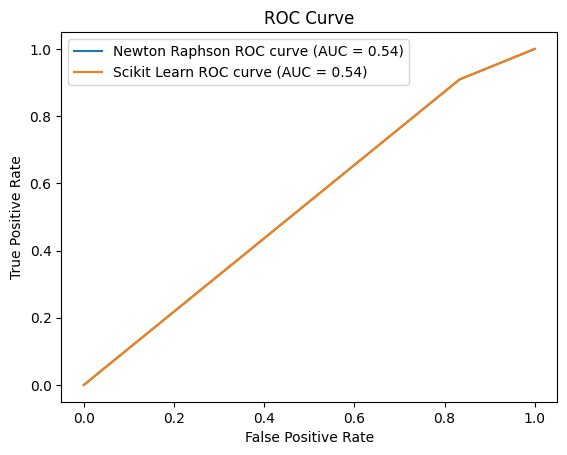

In [34]:
# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, NP_preds)
fpr2, tpr2, _ = roc_curve(y_test, SC_preds)
roc_auc = auc(fpr, tpr)
roc_auc2 = auc(fpr2, tpr2)
plt.plot(fpr, tpr, label=f"Newton Raphson ROC curve (AUC = {roc_auc:.2f})")
plt.plot(fpr2, tpr2, label=f"Scikit Learn ROC curve (AUC = {roc_auc2:.2f})")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [35]:
# Feature importance
feature_importance = np.abs(beta)
feature_importance_sklearn = np.abs(logreg.coef_[0])
print(f"Feature importance:")
for i, feature in enumerate(['age of patient', 'year of operation', 'nodes_detected']):
    total_importance = np.sum(feature_importance)
    feature_percentage = (feature_importance[i] / total_importance) * 100
    print(f"newton: {feature}: {feature_importance[i]:.4f}, part: {feature_percentage:.2f}%")

    total_importance_sklearn = np.sum(feature_importance_sklearn)
    feature_percentage_sklearn = (feature_importance_sklearn[i] / total_importance_sklearn) * 100
    print(f"sklearn: {feature}: {feature_importance_sklearn[i]:.4f}, part: {feature_percentage_sklearn:.2f}%")
    print("=====================================")






Feature importance:
newton: age of patient: 0.0326, part: 17.41%
sklearn: age of patient: 0.0332, part: 18.80%
newton: year of operation: 0.0519, part: 27.71%
sklearn: year of operation: 0.0405, part: 22.95%
newton: nodes_detected: 0.1028, part: 54.88%
sklearn: nodes_detected: 0.1027, part: 58.25%


In [36]:
# Gradient of the negative log-posterior
def grad_neg_log_posterior(beta, X, y):
    p = sigmoid(np.dot(X, beta))
    prior_grad = beta  # Assuming a standard normal prior
    grad_value = np.dot(X.T, (p - y)) + prior_grad
    return grad_value     #TODO: Implement the gradient of Negative log-posterior


# Hessian of the negative log-posterior
def hessian_neg_log_posterior(beta, X):
    p = sigmoid(np.dot(X, beta))
    prior_hess = np.eye(X.shape[1])  # Assuming a standard normal prior
    hess_value = np.dot(np.dot(X.T, np.diag(p * (1 - p))), X) + prior_hess
    return hess_value       # TODO: Implement the hessian of Negative log-posterior

# Newton-Raphson optimization
def newton_raphson(X, y, tol=1e-6, max_iter=100):   # TODO: Implement the Newton-Raphson optimization
    n_features = X.shape[1]
    beta = np.zeros(n_features)    

    for i in range(max_iter):
        grad = grad_neg_log_posterior(beta, X, y)
        hess = hessian_neg_log_posterior(beta, X)

        try:
            delta = np.linalg.inv(hess).dot(grad)
        except np.linalg.LinAlgError:
            print("Singular matrix, adding small perturbation")
            epsilon = 1e-6
            delta = np.linalg.pinv(hess+epsilon*np.eye(hess.shape[0])).dot(grad)
        
        beta -= delta

        if np.linalg.norm(delta) < tol:
            print(f"Converged after {i} iterations")
            return beta
    
    print("Did not converge")
    return beta

In [37]:
hessian = hessian_neg_log_posterior
gradient = grad_neg_log_posterior

# Train logistic regression model for Laplace approximation
LA_beta = newton_raphson(X_train, y_train)

# Predictions and evaluation metrics for Newton Raphson
LA_preds = predict(X_test, LA_beta)
LA_accuracy = accuracy_score(y_test, LA_preds)
LA_precision = precision_score(y_test, LA_preds)
LA_recall = recall_score(y_test, LA_preds)
LA_f1 = f1_score(y_test, LA_preds)

# Print metrics
print(f"Laplace approximation Accuracy: {LA_accuracy:.2f}")
print(f"Laplace approximation Precision: {LA_precision:.2f}")
print(f"Laplace approximation Recall: {LA_recall:.2f}")
print(f"Laplace approximation F1 Score: {LA_f1:.2f}")

Converged after 4 iterations
Laplace approximation Accuracy: 0.69
Laplace approximation Precision: 0.73
Laplace approximation Recall: 0.91
Laplace approximation F1 Score: 0.81
